In [ ]:
## AAS LAB TEST SUBMISSIOn


In [ ]:
'''240810125003
Vansh Sachdeva'''


/tmp/ipykernel_30671/178105148.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic.groupby(['pclass', 'sex'])['survived'].mean()
/tmp/ipykernel_30671/178105148.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_dev_survival_rates = titanic.groupby(['pclass', 'sex'])['survived'].std()
/tmp/ipykernel_30671/178105148.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_plot_data =

Survival Rates by Class and Gender:
 pclass  sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

Standard Deviation of Survival Rates by Class and Gender:
 pclass  sex   
1       female    0.176716
        male      0.484484
2       female    0.271448
        male      0.365882
3       female    0.501745
        male      0.342694
Name: survived, dtype: float64

ANOVA Table:
                       sum_sq     df           F        PR(>F)
C(pclass)          15.286098    2.0   52.931238  1.934085e-22
C(sex)             53.165350    1.0  368.191786  6.962809e-69
C(pclass):C(sex)    5.437720    2.0   18.829215  9.812394e-09
Residual          127.790290  885.0         NaN           NaN

Hypothesis Test Results:
- Reject the null hypothesis for Passenger Class (p = 0.000): Class significantly affects survival rate.
- Reject the null hypothesis fo

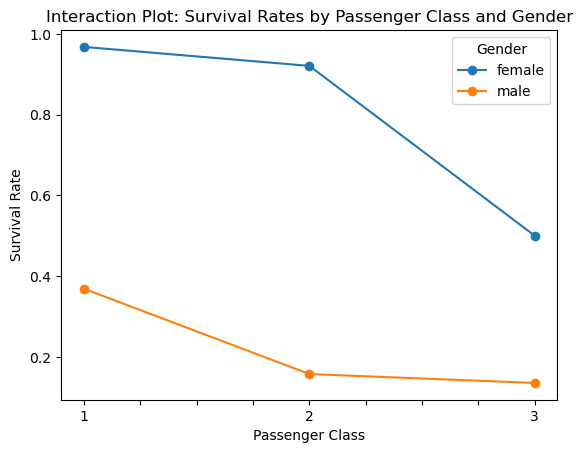

In [1]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Drop rows with missing values in 'survived', 'pclass', or 'sex'
titanic = titanic.dropna(subset=['survived', 'pclass', 'sex'])

# Convert 'pclass' to a categorical variable for ANOVA
titanic['pclass'] = titanic['pclass'].astype('category')

# Calculate survival rates by class and gender
survival_rates = titanic.groupby(['pclass', 'sex'])['survived'].mean()
print("Survival Rates by Class and Gender:\n", survival_rates)

# Calculate standard deviation of survival rates across class and gender groups
std_dev_survival_rates = titanic.groupby(['pclass', 'sex'])['survived'].std()
print("\nStandard Deviation of Survival Rates by Class and Gender:\n", std_dev_survival_rates)

# Two-way ANOVA to test for interaction effects
model = ols('survived ~ C(pclass) * C(sex)', data=titanic).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:\n", anova_table)

# Extract p-values for each factor and interaction term
alpha = 0.05  # Significance level
p_class = anova_table.loc['C(pclass)', 'PR(>F)']
p_gender = anova_table.loc['C(sex)', 'PR(>F)']
p_interaction = anova_table.loc['C(pclass):C(sex)', 'PR(>F)']

# Interpret results based on p-values
print("\nHypothesis Test Results:")
if p_class < alpha:
    print(f"- Reject the null hypothesis for Passenger Class (p = {p_class:.3f}): Class significantly affects survival rate.")
else:
    print(f"- Fail to reject the null hypothesis for Passenger Class (p = {p_class:.3f}): No significant effect of class on survival rate.")

if p_gender < alpha:
    print(f"- Reject the null hypothesis for Gender (p = {p_gender:.3f}): Gender significantly affects survival rate.")
else:
    print(f"- Fail to reject the null hypothesis for Gender (p = {p_gender:.3f}): No significant effect of gender on survival rate.")

if p_interaction < alpha:
    print(f"- Reject the null hypothesis for Interaction Effect (p = {p_interaction:.3f}): Significant interaction between class and gender.")
else:
    print(f"- Fail to reject the null hypothesis for Interaction Effect (p = {p_interaction:.3f}): No significant interaction between class and gender.")

# Interaction plot of survival rates by passenger class and gender
interaction_plot_data = titanic.groupby(['pclass', 'sex'])['survived'].mean().unstack()
interaction_plot_data.plot(kind='line', marker='o')
plt.title('Interaction Plot: Survival Rates by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()


Standard Deviation of Glucose Levels at Each Time Point:
 time_point
after      9.004981
before     8.722691
during    12.186783
Name: glucose, dtype: float64

Repeated-Measures ANOVA Table:
                  Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
time_point 68.0553 2.0000 38.0000 0.0000


Hypothesis Test Result:
- Reject the null hypothesis (p = 0.000): Significant difference in glucose levels across time points.


/tmp/ipykernel_30268/985721698.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table.anova_table['Pr > F'][0]


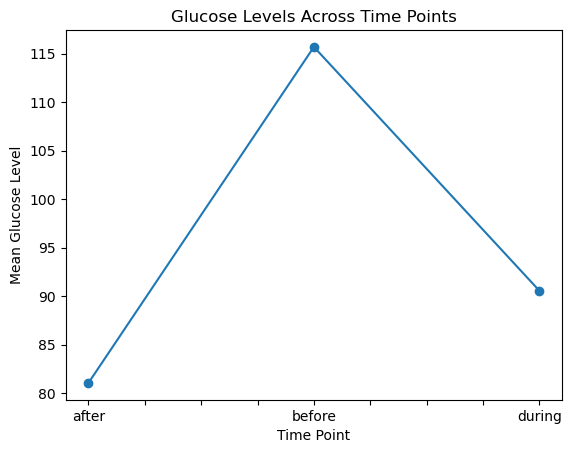

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt

# Simulating data with one observation per subject per time point
np.random.seed(0)
data = {
    'subject': np.arange(1, 21),
    'before': np.random.normal(110, 10, 20),
    'during': np.random.normal(90, 10, 20),
    'after': np.random.normal(85, 10, 20)
}

# Convert data to long format
df = pd.DataFrame(data)
df_long = pd.melt(df, id_vars=['subject'], value_vars=['before', 'during', 'after'],
                  var_name='time_point', value_name='glucose')

# Calculate standard deviation of glucose levels at each time point
std_dev_glucose = df_long.groupby('time_point')['glucose'].std()
print("Standard Deviation of Glucose Levels at Each Time Point:\n", std_dev_glucose)

# Repeated-measures ANOVA
anova = AnovaRM(df_long, 'glucose', 'subject', within=['time_point'])
anova_table = anova.fit()
print("\nRepeated-Measures ANOVA Table:\n", anova_table)

# Extract p-value for the time effect
p_value = anova_table.anova_table['Pr > F'][0]
alpha = 0.05  # Significance level

# Interpret p-value
print("\nHypothesis Test Result:")
if p_value < alpha:
    print(f"- Reject the null hypothesis (p = {p_value:.3f}): Significant difference in glucose levels across time points.")
else:
    print(f"- Fail to reject the null hypothesis (p = {p_value:.3f}): No significant difference in glucose levels across time points.")

# Line plot showing glucose level trends across time points
glucose_means = df_long.groupby('time_point')['glucose'].mean()
glucose_means.plot(kind='line', marker='o')
plt.title('Glucose Levels Across Time Points')
plt.xlabel('Time Point')
plt.ylabel('Mean Glucose Level')
plt.show()


Standard Deviation of Scores by Subject:
 subject
English     9.650439
Math       11.003284
Science     9.142385
Name: score, dtype: float64

Hypothesis Test Result:
- Reject the null hypothesis (p = 0.000): Significant difference in mean scores across subjects.


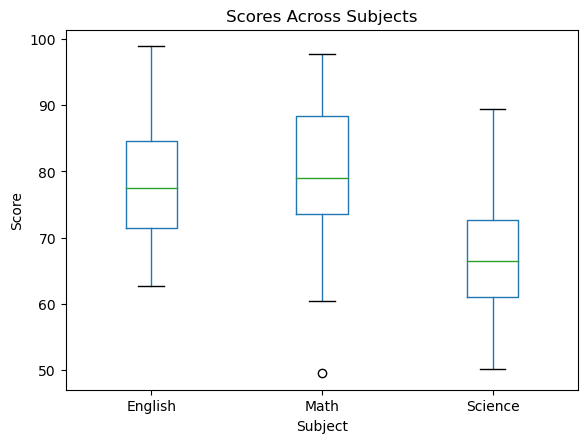

In [7]:
# Question 3
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Creating a sample dataset with scores across subjects
np.random.seed(0)
data = {
    'subject': ['Math'] * 30 + ['Science'] * 30 + ['English'] * 30,
    'score': np.concatenate([
        np.random.normal(75, 10, 30),  # Math scores
        np.random.normal(70, 10, 30),  # Science scores
        np.random.normal(80, 10, 30)   # English scores
    ])
}

df = pd.DataFrame(data)

# Calculate standard deviation of scores for each subject
std_dev_scores = df.groupby('subject')['score'].std()
print("Standard Deviation of Scores by Subject:\n", std_dev_scores)

# One-way ANOVA to test for differences in mean scores across subjects
anova_result = stats.f_oneway(
    df[df['subject'] == 'Math']['score'],
    df[df['subject'] == 'Science']['score'],
    df[df['subject'] == 'English']['score']
)
p_value = anova_result.pvalue
alpha = 0.05  # Significance level

# Interpret p-value
print("\nHypothesis Test Result:")
if p_value < alpha:
    print(f"- Reject the null hypothesis (p = {p_value:.3f}): Significant difference in mean scores across subjects.")
else:
    print(f"- Fail to reject the null hypothesis (p = {p_value:.3f}): No significant difference in mean scores across subjects.")

# Box plot of scores across different subjects
df.boxplot(column='score', by='subject', grid=False)
plt.title('Scores Across Subjects')
plt.suptitle("")  # Suppress the default title to clean up the plot
plt.xlabel('Subject')
plt.ylabel('Score')
plt.show()


Mean Age of Survivors: 31.19
Standard Deviation of Survivors' Ages: 10.77

Hypothesis Test Result:
- Fail to reject the null hypothesis (p = 0.327): No significant difference in mean age from 30 years.


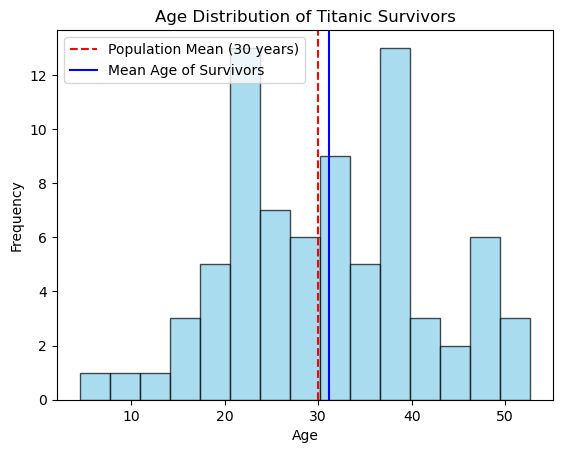

In [10]:
# Question 4


import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulating Titanic dataset with ages and survival status
np.random.seed(0)
data = {
    'age': np.random.normal(30, 10, 200),  # Ages centered around 30 with some variability
    'survived': np.random.choice([0, 1], size=200, p=[0.6, 0.4])  # 40% survival rate
}

df = pd.DataFrame(data)

# Filter for survivors
survivors = df[df['survived'] == 1]

# Calculate sample mean and standard deviation of survivor ages
mean_age_survivors = survivors['age'].mean()
std_dev_age_survivors = survivors['age'].std()
print(f"Mean Age of Survivors: {mean_age_survivors:.2f}")
print(f"Standard Deviation of Survivors' Ages: {std_dev_age_survivors:.2f}")

# One-sample Z-test
population_mean = 30
sample_size = len(survivors)
z_score = (mean_age_survivors - population_mean) / (std_dev_age_survivors / np.sqrt(sample_size))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # two-tailed test
alpha = 0.05

# Hypothesis Test Result
print("\nHypothesis Test Result:")
if p_value < alpha:
    print(f"- Reject the null hypothesis (p = {p_value:.3f}): Significant difference in mean age from 30 years.")
else:
    print(f"- Fail to reject the null hypothesis (p = {p_value:.3f}): No significant difference in mean age from 30 years.")

# Histogram of survivor ages with the population mean highlighted
plt.hist(survivors['age'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=1.5, label='Population Mean (30 years)')
plt.axvline(mean_age_survivors, color='blue', linestyle='solid', linewidth=1.5, label='Mean Age of Survivors')
plt.title('Age Distribution of Titanic Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Estimated Probability of Survival for a Random Passenger: 0.3815


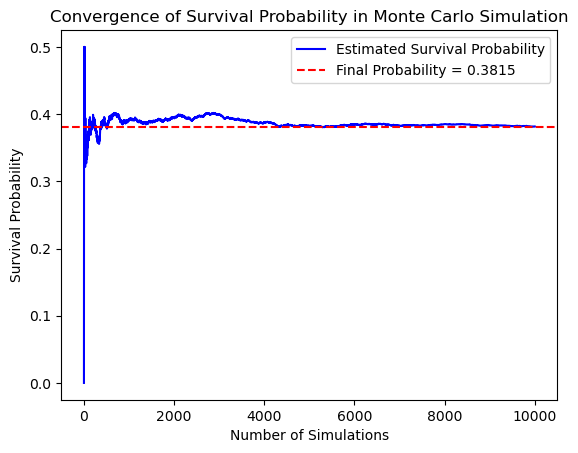

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate Titanic dataset with relevant factors
np.random.seed(0)
data = {
    'class': np.random.choice(['First', 'Second', 'Third'], 200, p=[0.2, 0.2, 0.6]),
    'age': np.random.normal(30, 10, 200),  # Ages centered around 30 with variability
    'gender': np.random.choice(['male', 'female'], 200, p=[0.5, 0.5]),
    'survived': np.random.choice([0, 1], 200, p=[0.6, 0.4])  # 40% survival rate
}
df = pd.DataFrame(data)

# Monte Carlo simulation parameters
n_simulations = 10000
survival_count = 0
survival_counts = []

# Run Monte Carlo simulations
for _ in range(n_simulations):
    selected_passenger = df.sample(1)
    if selected_passenger['survived'].values[0] == 1:
        survival_count += 1
    survival_counts.append(survival_count / (_ + 1))  # Cumulative survival probability

# Final estimated survival probability
survival_probability = survival_count / n_simulations
print(f"Estimated Probability of Survival for a Random Passenger: {survival_probability:.4f}")

# Plotting the convergence of survival probability across simulations
plt.plot(range(1, n_simulations + 1), survival_counts, color='blue', label="Estimated Survival Probability")
plt.axhline(y=survival_probability, color='red', linestyle='--', label=f'Final Probability = {survival_probability:.4f}')
plt.xlabel('Number of Simulations')
plt.ylabel('Survival Probability')
plt.title('Convergence of Survival Probability in Monte Carlo Simulation')
plt.legend()
plt.show()


Estimated Mean Glucose Level: 101.08
Estimated Standard Deviation of Mean Glucose Level: 2.82


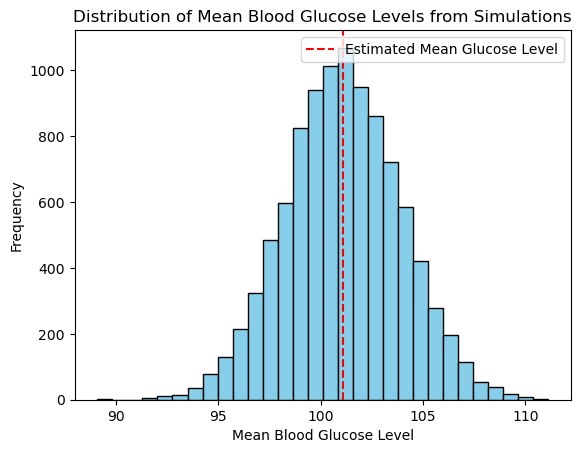

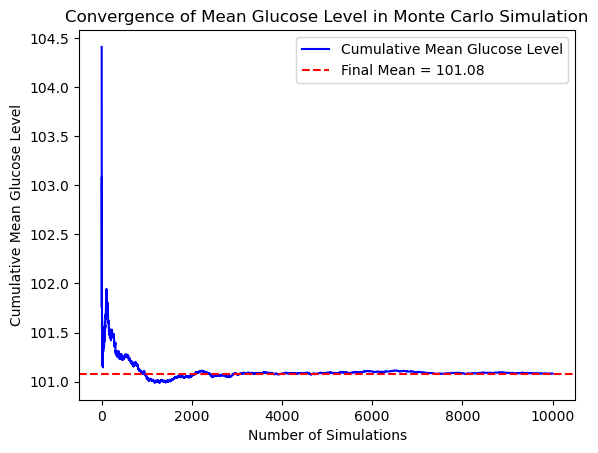

In [13]:
# Question 11
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate a Diabetes dataset with glucose levels
np.random.seed(0)
glucose_levels = np.random.normal(100, 15, 200)  # Glucose levels with mean 100 and SD 15

# Monte Carlo simulation parameters
n_simulations = 10000
sample_size = 30  # Sample size for each simulation
mean_glucose_levels = []

# Run Monte Carlo simulations
for _ in range(n_simulations):
    sample = np.random.choice(glucose_levels, sample_size, replace=True)
    mean_glucose_levels.append(np.mean(sample))

# Calculate estimated mean and standard deviation of simulated means
estimated_mean_glucose = np.mean(mean_glucose_levels)
estimated_std_dev = np.std(mean_glucose_levels)
print(f"Estimated Mean Glucose Level: {estimated_mean_glucose:.2f}")
print(f"Estimated Standard Deviation of Mean Glucose Level: {estimated_std_dev:.2f}")

# Plot histogram of the mean glucose levels across simulations
plt.hist(mean_glucose_levels, bins=30, color='skyblue', edgecolor='black')
plt.axvline(estimated_mean_glucose, color='red', linestyle='dashed', linewidth=1.5, label='Estimated Mean Glucose Level')
plt.title('Distribution of Mean Blood Glucose Levels from Simulations')
plt.xlabel('Mean Blood Glucose Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot convergence of the estimated mean glucose level
cumulative_means = np.cumsum(mean_glucose_levels) / np.arange(1, n_simulations + 1)
plt.plot(range(1, n_simulations + 1), cumulative_means, color='blue', label="Cumulative Mean Glucose Level")
plt.axhline(y=estimated_mean_glucose, color='red', linestyle='--', label=f'Final Mean = {estimated_mean_glucose:.2f}')
plt.xlabel('Number of Simulations')
plt.ylabel('Cumulative Mean Glucose Level')
plt.title('Convergence of Mean Glucose Level in Monte Carlo Simulation')
plt.legend()
plt.show()
